# **MÓDULO 27 - Projeto de Doenças Cardiovasculares - Regressão Logística**


Assim como na aula que trabalhamos com uma base de dados nova, com um contexto de modelo de propensão a compra de carros, para a atividade de vocês achei interessante trazer também novos desafios.

Nessa tarefa iremos construir um modelo que nos ajude a prever doenças cardiovasculares, a base contém dados reais.

age - idade dos pacientes

gender - genero (2 mulheres) (1 homens)

height - altura dos pacientes

weight - peso dos pacientes

gluc - glicose

smoke - fumante (1) não fumante (0)

alco - consume alcool (1) não consome (0)

active - realiza atividades fisicas (1) não realiza (0)

cardio_disease - tem doença cardio (1) não tem (0) - Variável target


Seu objetivo é utilizar esses dados históricos dos pacientes e construir um bom modelo de regressão capaz de indicar se novos pacientes estão propensos a doenças cariovasculares ou não.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
import plotly.express as px

# 1) Comece carregando e tratando a base de dados.
Assim como na aula essa nova base não passou por pré processamento nenhum então nessa etapa, carrega os dados, verifique os tipos de dados, verifique se temos dados faltantes e outliers.
Quando necessário realize o tratamento.


In [4]:
df = pd.read_csv("CARDIO_BASE.csv", delimiter=';')

In [7]:
df.head(10)

,age,gender,height,weight,cholesterol,gluc,smoke,alco,active,cardio_disease
0,50,2,168,62,1,1,0,0,1,0
1,55,1,156,85,3,1,0,0,1,1
2,52,1,165,64,3,1,0,0,0,1
3,48,2,169,82,1,1,0,0,1,1
4,48,1,156,56,1,1,0,0,0,0
5,60,1,151,67,2,2,0,0,0,0
6,61,1,157,93,3,1,0,0,1,0
7,62,2,178,95,3,3,0,0,1,1
8,48,1,158,71,1,1,0,0,1,0
9,54,1,164,68,1,1,0,0,0,0


In [5]:
df.dtypes

age                int64
gender             int64
height             int64
weight            object
cholesterol        int64
gluc               int64
smoke              int64
alco               int64
active             int64
cardio_disease     int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             10000 non-null  int64 
 1   gender          10000 non-null  int64 
 2   height          10000 non-null  int64 
 3   weight          10000 non-null  object
 4   cholesterol     10000 non-null  int64 
 5   gluc            10000 non-null  int64 
 6   smoke           10000 non-null  int64 
 7   alco            10000 non-null  int64 
 8   active          10000 non-null  int64 
 9   cardio_disease  10000 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 781.4+ KB


In [9]:
df['weight'] = df['weight'].str.replace(',', '.').astype(float)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             10000 non-null  int64  
 1   gender          10000 non-null  int64  
 2   height          10000 non-null  int64  
 3   weight          10000 non-null  float64
 4   cholesterol     10000 non-null  int64  
 5   gluc            10000 non-null  int64  
 6   smoke           10000 non-null  int64  
 7   alco            10000 non-null  int64  
 8   active          10000 non-null  int64  
 9   cardio_disease  10000 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 781.4 KB


In [11]:
df.isnull().sum()

age               0
gender            0
height            0
weight            0
cholesterol       0
gluc              0
smoke             0
alco              0
active            0
cardio_disease    0
dtype: int64

In [12]:
df.describe()

,age,gender,height,weight,cholesterol,gluc,smoke,alco,active,cardio_disease
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,53.288300,1.345400,164.308200,74.303710,1.365000,1.222200,0.089000,0.053700,0.797200,0.503100
std,6.796234,0.475522,8.178796,14.566353,0.677658,0.565561,0.284758,0.225436,0.402105,0.500015
min,30.000000,1.000000,70.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,58.000000,2.000000,170.000000,82.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,250.000000,200.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


# 2) Agora é hora de explorar os dados com uma análise bem completa.
Plote pelo menos 3 gráficos analisando o comportamento da variável cardio com outras variaveis da sua preferência (análise bivariada). Não se esqueça de trazer insights acerca do analisado.


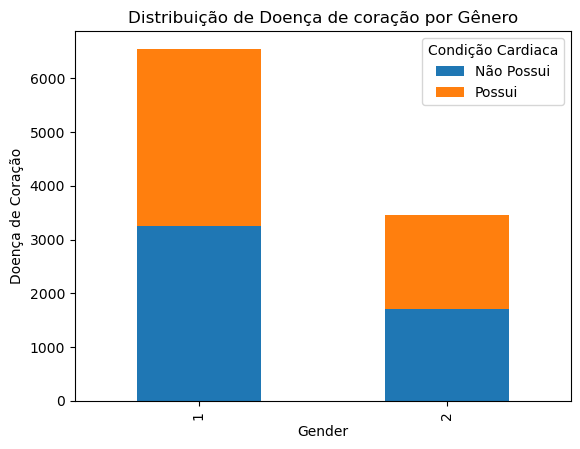

In [17]:
# breve analise bivariada para conhecermos melhor nossos dados
contagem = pd.crosstab(df['gender'], df['cardio_disease'])
contagem.plot(kind='bar', stacked=True)
plt.title('Distribuição de Doença de coração por Gênero')
plt.xlabel('Gender')
plt.ylabel('Doença de Coração')
plt.legend(title='Condição Cardiaca', labels=['Não Possui', 'Possui'])
plt.show()

In [21]:
df_grouped = df.groupby(['gender', 'cardio_disease']).size().reset_index(name='count')
total_por_genero = df_grouped.groupby('gender')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_genero ) * 100

fig = px.bar(df_grouped, x='gender', y='percent', color='cardio_disease', barmode='stack',
             labels={'gender': 'Gênero', 'percent': 'Porcentagem', 'cardio_disease': 'Doença do coração'})

fig.update_layout(title='Relação entre Gênero e Doença do coração',
                  yaxis_title='Porcentagem',
                  legend_title='Doença do coração')

fig.show()

Podemos notar que homens têm uma maior prevalência de doenças cardíacas em comparação com mulheres. Isso pode ser um ponto importante a ser considerado na análise.
além disso homens tem uma maior prevalência de doenças cardíacas em comparação com mulheres.

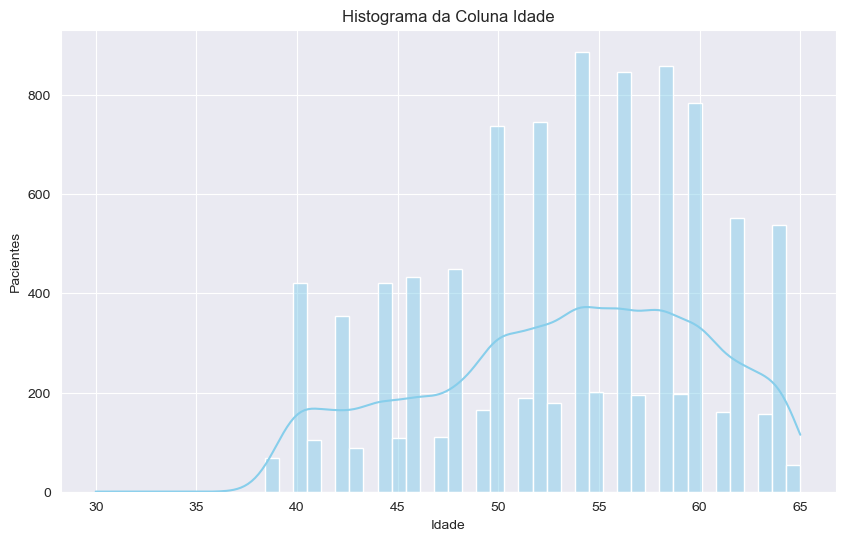

In [ ]:
sns.set_style('darkgrid')

# histograma da coluna idade para analisarmos a distribuição dos dados
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', bins=50, kde=True, color='skyblue')
plt.title('Histograma da Coluna Idade')
plt.xlabel('Idade')
plt.ylabel('Pacientes')
plt.show()

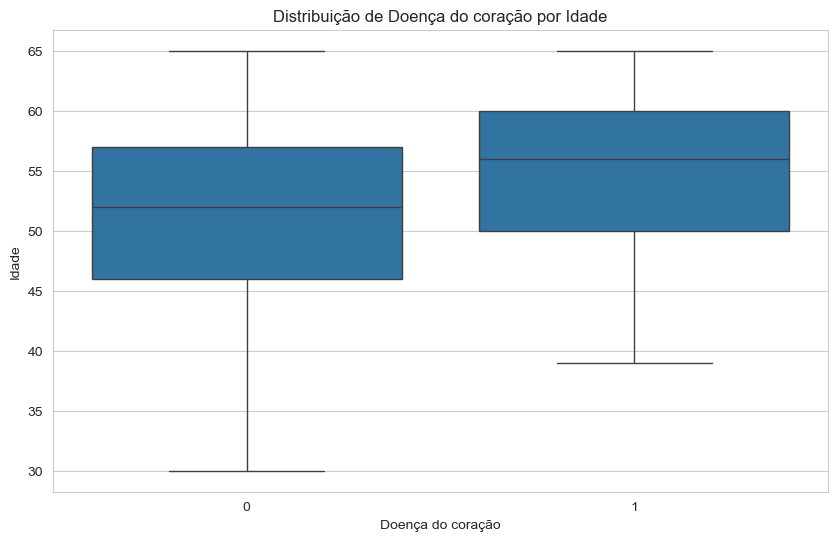

In [28]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='cardio_disease', y='age')
plt.title("Distribuição de Doença do coração por Idade")
plt.xlabel("Doença do coração")
plt.ylabel("Idade")
plt.show()

Podemos observar pela distribuição que a presenção de pessoas com doença cardiaca é muito mais comum após os 40 anos

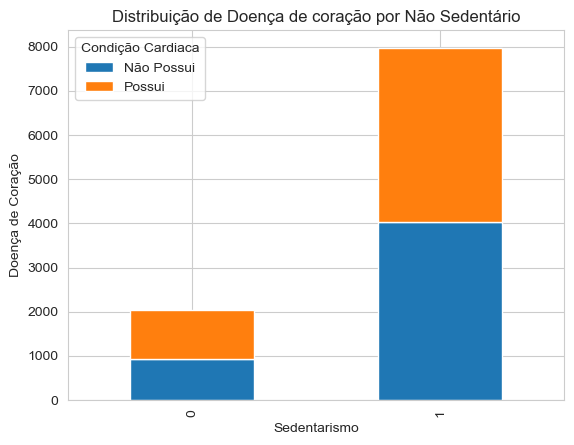

In [31]:
# breve analise bivariada para conhecermos melhor nossos dados
contagem = pd.crosstab(df['active'], df['cardio_disease'])
contagem.plot(kind='bar', stacked=True)
plt.title('Distribuição de Doença de coração por Não Sedentário')
plt.xlabel('Sedentarismo')
plt.ylabel('Doença de Coração')
plt.legend(title='Condição Cardiaca', labels=['Não Possui', 'Possui'])
plt.show()

In [32]:
df_grouped = df.groupby(['active', 'cardio_disease']).size().reset_index(name='count')
total_por_sedentarismo= df_grouped.groupby('active')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_sedentarismo ) * 100

fig = px.bar(df_grouped, x='active', y='percent', color='cardio_disease', barmode='stack',
             labels={'active': 'Sedentarismo', 'percent': 'Porcentagem', 'cardio_disease': 'Doença do coração'})

fig.update_layout(title='Relação entre Sedentarismo e Doença do coração',
                  yaxis_title='Porcentagem',
                  legend_title='Doença do coração')

fig.show()

Na base de dados possui uma quantidade significativamente maior de registros de pessoas que praticam atividade física. Isso pode gerar um viés na análise, dando a impressão de que indivíduos fisicamente ativos apresentam maior propensão a doenças. No entanto, sabemos que, do ponto de vista lógico/biológico, a prática de atividade física é um fator de proteção. Esse é um ponto interessante que merece atenção na interpretação dos resultados.

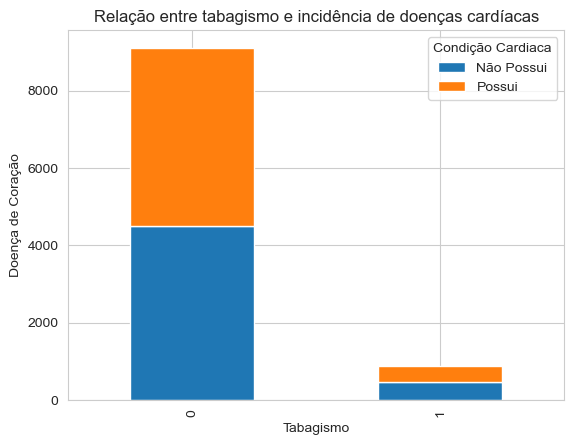

In [33]:
# breve analise bivariada para conhecermos melhor nossos dados
contagem = pd.crosstab(df['smoke'], df['cardio_disease'])
contagem.plot(kind='bar', stacked=True)
plt.title('Relação entre tabagismo e incidência de doenças cardíacas')
plt.xlabel('Tabagismo')
plt.ylabel('Doença de Coração')
plt.legend(title='Condição Cardiaca', labels=['Não Possui', 'Possui'])
plt.show()

In [34]:
df_grouped = df.groupby(['smoke', 'cardio_disease']).size().reset_index(name='count')
total_por_tabagismo= df_grouped.groupby('smoke')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_tabagismo ) * 100

fig = px.bar(df_grouped, x='smoke', y='percent', color='cardio_disease', barmode='stack',
             labels={'smoke': 'Tabagismo', 'percent': 'Porcentagem', 'cardio_disease': 'Doença do coração'})

fig.update_layout(title='Relação entre Tabagismo e Doença do coração',
                  yaxis_title='Porcentagem',
                  legend_title='Doença do coração')

fig.show()

Novamente, observamos que a base é composta majoritariamente por uma única classe, o que pode enviesar a análise. Por esse motivo, optei por plotar um segundo gráfico baseado em proporções, permitindo uma análise mais equilibrada. A partir dele, é possível perceber um leve desvio indicando uma maior incidência de doenças cardíacas entre os fumantes, ainda que discreto.

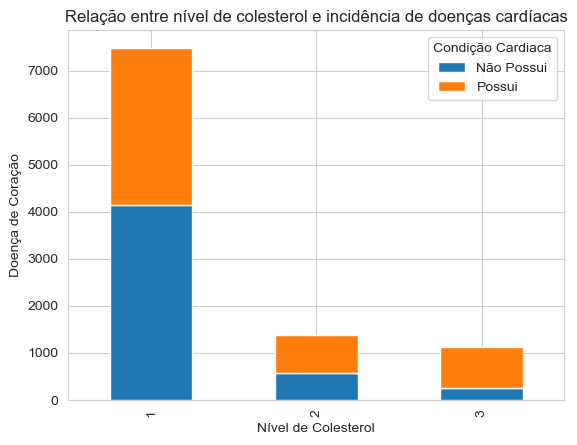

In [35]:
# breve analise bivariada para conhecermos melhor nossos dados
contagem = pd.crosstab(df['cholesterol'], df['cardio_disease'])
contagem.plot(kind='bar', stacked=True)
plt.title('Relação entre nível de colesterol e incidência de doenças cardíacas')
plt.xlabel('Nível de Colesterol')
plt.ylabel('Doença de Coração')
plt.legend(title='Condição Cardiaca', labels=['Não Possui', 'Possui'])
plt.show()

In [37]:
df_grouped = df.groupby(['cholesterol', 'cardio_disease']).size().reset_index(name='count')
total_por_colesterol = df_grouped.groupby('cholesterol')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_colesterol ) * 100

fig = px.bar(df_grouped, x='cholesterol', y='percent', color='cardio_disease', barmode='stack',
             labels={'cholesterol': 'Nível de Colesterol', 'percent': 'Porcentagem', 'cardio_disease': 'Doença do coração'})

fig.update_layout(title='Relação entre Nível de Colesterol e Doença do coração',
                  yaxis_title='Porcentagem',
                  legend_title='Doença do coração')

fig.show()

Assumindo que os níveis de colesterol seguem uma escala crescente (1 = baixo, 2 = médio, 3 = alto), os dados indicam uma correlação entre colesterol elevado e maior incidência de doenças cardíacas.

# 3) Nessa etapa você deve trazer a matriz de correlação e apontar insights acerca das variáveis com um relacionamento mais forte entre si.



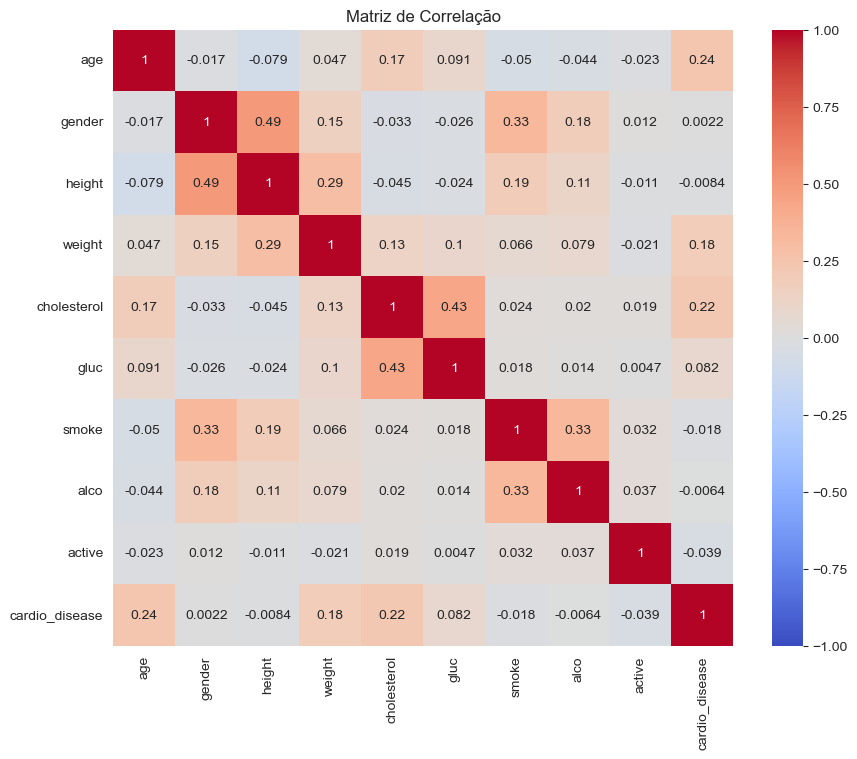

In [38]:
correlation_matrix = df.corr()

# Plotando a matriz de correlação usando seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação')
plt.show()

Do ponto de vista analítico, as correlações mais relevantes para nossa investigação são aquelas associadas à presença de doenças cardíacas. Neste caso, destacam-se idade, colesterol e peso, que apresentam correlação positiva com a variável alvo. Isso indica que, à medida que esses fatores aumentam, também cresce a probabilidade de ocorrência de doenças no coração.

# 4) Essa é a sua última etapa pré modelo. Você deve:

A) Separar a base em treino e teste.

In [39]:
# Separando em X (variáveis de entrada) e Y (variável de saída)
X = df.drop('cardio_disease', axis=1) # X contém todas as colunas, exceto 'cardio_disease'
Y = df['cardio_disease']  # Y contém apenas a coluna 'cardio_disease'

In [40]:
# Separar em base de treino e teste (usando 80% para treino e 20% para teste)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

B) Você considera que essa base precisa que os dados sejam padronizados? Se sim, porque? Se acredita que devem, então realize essa etapa.

Padronizar é recomendado para modelos que usam projeções e gradientes.

In [41]:
# Inicializar StandardScaler
sc = StandardScaler()

# Ajustando e transformando os dados de treino
X_train = sc.fit_transform(X_train)

# Transformando os dados de teste usando os parâmetros aprendidos dos dados de treino
X_test = sc.transform(X_test)

C) Verifique se os dados estão balanceados, se não, faça o balanceamento.

<Axes: xlabel='cardio_disease'>

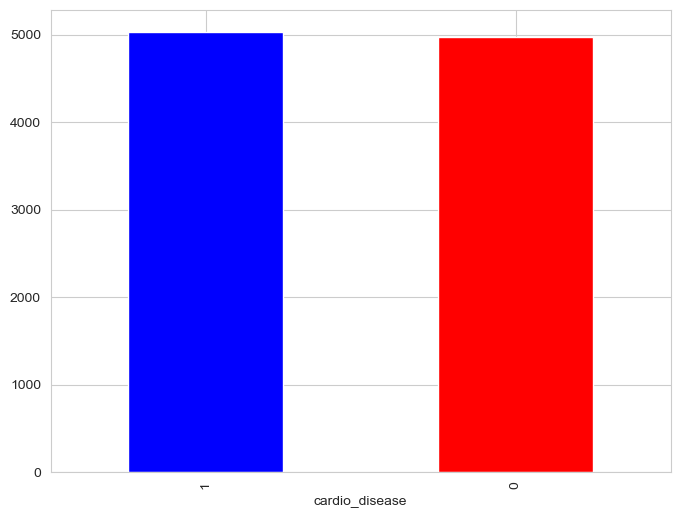

In [42]:
contagem = df['cardio_disease'].value_counts()
plt.figure(figsize=(8, 6))
contagem.plot(kind='bar', color=['blue','red'])

In [43]:
# Calcular e imprimir as porcentagens dos valores na coluna
print((df['cardio_disease'].value_counts(normalize=True) * 100))

cardio_disease
1    50.31
0    49.69
Name: proportion, dtype: float64


D) Visualize as bases de treino, teste (X E Y) e verifique se está tudo adequado.

In [44]:
X_train

array([[ 0.10037973, -0.73138185, -1.25610705, ..., -0.31328402,
        -0.24037742,  0.50780078],
       [-0.19393504,  1.36727483,  0.08809078, ..., -0.31328402,
        -0.24037742,  0.50780078],
       [ 1.4247962 , -0.73138185, -0.27850863, ..., -0.31328402,
        -0.24037742, -1.96927621],
       ...,
       [ 0.3946945 ,  1.36727483,  0.9434894 , ..., -0.31328402,
         4.16012454,  0.50780078],
       [-0.48824981, -0.73138185,  0.33249039, ..., -0.31328402,
        -0.24037742, -1.96927621],
       [ 0.3946945 ,  1.36727483,  1.31008881, ..., -0.31328402,
        -0.24037742,  0.50780078]])

In [45]:
X_test

array([[-0.63540719, -0.73138185, -0.03410902, ..., -0.31328402,
        -0.24037742, -1.96927621],
       [ 0.10037973,  1.36727483,  1.43228861, ..., -0.31328402,
        -0.24037742,  0.50780078],
       [ 0.10037973, -0.73138185, -0.76730784, ..., -0.31328402,
        -0.24037742,  0.50780078],
       ...,
       [-1.66550889, -0.73138185,  0.6990898 , ..., -0.31328402,
        -0.24037742,  0.50780078],
       [-0.48824981, -0.73138185,  0.45469019, ..., -0.31328402,
        -0.24037742,  0.50780078],
       [ 1.27763881,  1.36727483, -0.03410902, ..., -0.31328402,
        -0.24037742,  0.50780078]])

In [ ]:
Y_train

9254    0
1561    0
1670    1
6087    1
6669    0
       ..
5734    1
5191    0
5390    0
860     0
7270    0
Name: cardio_disease, Length: 8000, dtype: int64

In [51]:
Y_test

6252    0
4684    0
1731    1
4742    0
4521    1
       ..
6412    1
8285    1
7853    0
1095    1
6929    0
Name: cardio_disease, Length: 2000, dtype: int64

In [52]:
print("Tamanho de X_train:", X_train.shape)
print("Tamanho de X_test:", X_test.shape)
print("Tamanho de y_train:", Y_train.shape)
print("Tamanho de y_test:", Y_test.shape)

Tamanho de X_train: (8000, 9)
Tamanho de X_test: (2000, 9)
Tamanho de y_train: (8000,)
Tamanho de y_test: (2000,)


# 5) Realize a etapa de treinamento do modelo:

A) Faça o treinamento do modelo.

In [53]:
logistic_cardio = LogisticRegression(random_state = 0)

In [54]:
logistic_cardio.fit(X_train, Y_train)

LogisticRegression(random_state=0)

B) Traga o intercept e os coeficientes.

In [55]:
logistic_cardio.intercept_

array([0.03115922])

In [56]:
logistic_cardio.coef_

array([[ 0.44167737,  0.01136716, -0.07874376,  0.35174949,  0.40775358,
        -0.06977903, -0.02916595, -0.00652814, -0.0763706 ]])

c) Avalie as métricas do modelo treinado

In [57]:
previsoes = logistic_cardio.predict(X_train)

In [58]:
relatorio = classification_report(Y_train, previsoes)
print("Relatório de Classificação:")
print(relatorio)

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.63      0.66      0.64      3968
           1       0.65      0.62      0.63      4032

    accuracy                           0.64      8000
   macro avg       0.64      0.64      0.64      8000
weighted avg       0.64      0.64      0.64      8000



* A precisão de 0.65 para a classe 1 indica que 65% das instâncias que foram previstas como classe 1 realmente pertencem à classe 1.

* A revocação de 0.62 para a classe 1 indica que 62% das instâncias que pertencem à classe 1 foram corretamente identificadas pelo modelo.

* O F1-score de 0.63 para a classe 1 é a média harmônica da precisão e da revocação para a classe 1.


D) Justifique se te parece que o modelo tem feito boas previsões ou não.

Embora o modelo apresente um desempenho estatisticamente aceitável, sua aplicação prática levanta preocupações. Como se trata da previsão de doenças cardíacas um contexto crítico que envolve vidas humanas,  creio que um modelo com acurácia abaixo de 98% dificilmente seria posto em produção. Em casos sensíveis como esse a margem de erro deve ser mínima (praticamente inexistente), exigindo modelos com alto desempenho, validação  e controle rigoroso sobre falsos negativos.

# 6) Teste seu modelo!

A) Aplique o modelo aos dados de teste.

In [61]:
Y_pred_test = logistic_cardio.predict(X_test)

In [62]:
relatorio = classification_report(Y_test, Y_pred_test)
print("Relatório de Classificação:")
print(relatorio)

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.64      0.69      0.67      1001
           1       0.67      0.62      0.64       999

    accuracy                           0.65      2000
   macro avg       0.65      0.65      0.65      2000
weighted avg       0.65      0.65      0.65      2000



B) Avalie as métricas do modelo treinado

* A precisão de 0.67 para a classe 1 indica que 67% das instâncias que foram previstas como classe 1 realmente pertencem à classe 1.

* A revocação de 0.62 para a classe 1 indica que 62% das instâncias que pertencem à classe 1 foram corretamente identificadas pelo modelo.

* O F1-score de 0.64 para a classe 1 é a média harmônica da precisão e da revocação para a classe 1.

C) Plote o gráfico da curva AUC-ROC e explique o que consegue analisar através do gráfico.

In [63]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_test)

# Calcular a AUC
roc_auc = roc_auc_score(Y_test, Y_pred_test)
print("AUC: {:.2f}".format(roc_auc))

AUC: 0.65


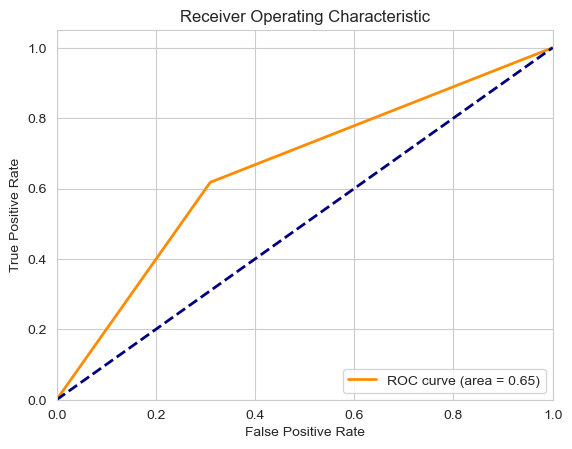

In [64]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

A curva AUC-ROC mostra que o modelo tem uma performance aceitável, mas longe do ideal. A 'barriga' da curva está  próxima da linha de referência, o que indica que ele não consegue separar muito bem as classes. Isso mostra que, apesar de funcionar, o modelo ainda tem dificuldade em distinguir corretamente quem tem ou não a doença, o que é bem crítico considerando que estamos falando de saúde. Nesse tipo de aplicação, o ideal seria ter uma curva bem mais próxima do canto superior esquerdo, indicando maior precisão e menos erros.

# 7) Explique:

A) Explique com suas palavras regressão logistica.

Apesar do nome ‘regressão’ a regressão logística é um modelo de machine learning usado para classificação. Ela serve para calcular a probabilidade de um ou mais  variáveis indicarem que uma determinada amostra pertence a uma classe específica, ou seja ela é usada para prever categorias, como por exemplo, se uma pessoa tem ou não uma doença, com base em características como idade, colesterol, peso.

B) Explique porque a regressão logistica é um modelo de classificação.

A regressão logística é um modelo de classificação, pois retorna a probabilidade de uma determinada amostra, com certas características, pertencer a uma classe específica. No nosso caso, essa classe representa a presença ou não de doenças cardíacas.

C) Explique quais pontos em comum a regressão logistica tem da regressão linear.

A regressão logística tem alguns pontos em comum com a regressão linear, as duas utilizam uma combinação linear das variáveis independentes para fazer previsões, as duas realizam o cálculo de coeficientes que indicam o peso de cada variável na predição.